In [93]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as pyplot
from keras.models import Sequential
from keras.initializers import glorot_normal
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Activation
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.losses import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()

# Read data into CSV and do some data cleaning
##### (1) Read in housing CSV data
##### (2) Map values of ocean_proximity to integers
##### (3) Fill in missing data with mean values from other data points
##### (4) Normalize data with z-scores


In [151]:
housing_data = pd.read_csv("./data/housing.csv")
housing_data['ocean_proximity']=number.fit_transform(housing_data['ocean_proximity'].astype('str'))
housing_data.fillna(housing_data.mean(), inplace=True)
house_value_mean = housing_data["median_house_value"].mean()
house_value_sd = housing_data["median_house_value"].std()

housing_data = (housing_data - housing_data.mean()) / housing_data.std()

print(housing_data.tail())

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20635  -0.758808  1.801603           -0.289180    -0.444974       -0.390850   
20636  -0.818702  1.806285           -0.845373    -0.888682       -0.925117   
20637  -0.823693  1.778194           -0.924829    -0.174991       -0.126102   
20638  -0.873605  1.778194           -0.845373    -0.355591       -0.307371   
20639  -0.833676  1.750104           -1.004285     0.068407        0.186348   

       population  households  median_income  median_house_value  \
20635   -0.512579   -0.443438      -1.216099           -1.115777   
20636   -0.944382   -1.008396      -0.691576           -1.124443   
20637   -0.369528   -0.174037      -1.142566           -0.992722   
20638   -0.604415   -0.393743      -1.054557           -1.058583   
20639   -0.033976    0.079670      -0.780111           -1.017853   

       ocean_proximity  
20635        -0.116736  
20636        -0.116736  
20637        -0.116736  
20638        -0.

In [116]:
# Features for training
features = housing_data.columns
features = features.drop("median_house_value")

In [118]:
# Split into training and testing data
train_portion = 0.8
train_rows = int(housing_data.shape[0] * train_portion)
shuffled_data = housing_data.sample(frac=1)
train_data = shuffled_data[:train_rows]
test_data = shuffled_data[train_rows:]

In [119]:
# Divide training data and labels
train_labels = train_data["median_house_value"]
train_data = train_data[features]

test_labels = test_data["median_house_value"]
test_data = test_data[features]

In [120]:
print(train_labels.tail())
print(train_data.tail())

997     0.086175
3659   -0.221463
2658   -1.179905
1247   -1.142641
9713    0.135570
Name: median_house_value, dtype: float64
      longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
997   -1.113182  0.968251           -0.527548     1.328024        0.966281   
3659   0.583821 -0.665680            1.299943    -0.762629       -0.851178   
2658  -2.211243  2.148053           -1.004285    -0.251081       -0.006847   
1247  -1.377715  1.623697           -1.481022    -1.086242       -1.135007   
9713  -1.048297  0.486031           -0.368636     0.199502        0.014619   

      population  households  median_income  ocean_proximity  
997     0.925879    1.073577       0.455532        -0.116736  
3659   -0.769542   -0.817461       0.499378        -0.820633  
2658   -0.538187   -0.453901      -1.343111        -0.820633  
1247   -1.122754   -1.178406      -0.853065        -0.116736  
9713    0.045497    0.158137       0.026965        -0.820633  


In [121]:
# Split between training and validation set
X_train, X_val, Y_train, Y_val = train_test_split(train_data, train_labels, test_size=0.2, random_state=2)

In [122]:
print(X_train.head())
print(X_train.shape)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
4815    0.638724 -0.745270            0.982119    -0.906101       -0.588815   
1302   -1.138138  1.108704           -0.209723     0.333806        0.076633   
16337  -0.893570  1.127431           -1.560478    -0.214870       -0.400391   
11562   0.788460 -0.881041           -0.527548     0.177958        0.515494   
18802  -1.252935  2.344686           -1.163197     0.212337       -0.045008   

       population  households  median_income  ocean_proximity  
4815    -0.177910   -0.548060      -0.941652        -0.820633  
1302     0.336014    0.173830       0.207403        -0.116736  
16337   -0.119630   -0.388512       0.609441        -0.116736  
11562    0.822565    0.636781      -0.293802        -0.820633  
18802    0.019006   -0.014489       0.075022        -0.116736  
(13209, 9)


In [138]:
# Model composition. 9 features, use relu activation for positive linear and random initialization with Xavier. 2 hidden layers
model = Sequential()
model.add(Dense(30, input_dim=9, activation="relu"))
model.add(Dense(15, activation="relu"))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse')

In [139]:
history = model.fit(X_train, Y_train, epochs=40, validation_data=(X_val, Y_val), verbose=2)

Train on 13209 samples, validate on 3303 samples
Epoch 1/40
 - 2s - loss: 0.4025 - val_loss: 0.3349
Epoch 2/40
 - 1s - loss: 0.3072 - val_loss: 0.3040
Epoch 3/40
 - 1s - loss: 0.2859 - val_loss: 0.2856
Epoch 4/40
 - 1s - loss: 0.2752 - val_loss: 0.2798
Epoch 5/40
 - 1s - loss: 0.2689 - val_loss: 0.2719
Epoch 6/40
 - 1s - loss: 0.2633 - val_loss: 0.2677
Epoch 7/40
 - 1s - loss: 0.2591 - val_loss: 0.2636
Epoch 8/40
 - 1s - loss: 0.2559 - val_loss: 0.2584
Epoch 9/40
 - 1s - loss: 0.2515 - val_loss: 0.2626
Epoch 10/40
 - 1s - loss: 0.2494 - val_loss: 0.2587
Epoch 11/40
 - 1s - loss: 0.2468 - val_loss: 0.2536
Epoch 12/40
 - 1s - loss: 0.2451 - val_loss: 0.2566
Epoch 13/40
 - 1s - loss: 0.2428 - val_loss: 0.2550
Epoch 14/40
 - 1s - loss: 0.2399 - val_loss: 0.2511
Epoch 15/40
 - 1s - loss: 0.2382 - val_loss: 0.2521
Epoch 16/40
 - 1s - loss: 0.2377 - val_loss: 0.2489
Epoch 17/40
 - 1s - loss: 0.2348 - val_loss: 0.2480
Epoch 18/40
 - 1s - loss: 0.2353 - val_loss: 0.2514
Epoch 19/40
 - 1s - loss

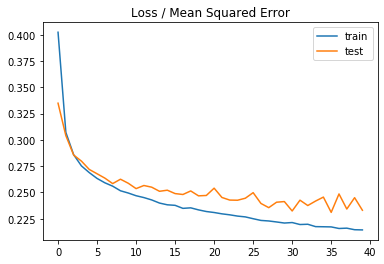

In [140]:
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

predict = model.predict(test_data)

In [152]:
predictions = predict*house_value_sd + house_value_mean
print("Predictions for test housing prices is: {}".format(predictions))

Predictions for test housing prices is: [[122706.12]
 [125279.59]
 [177259.89]
 ...
 [209436.33]
 [102102.2 ]
 [180824.23]]


In [145]:
print("Mean squared error between test_labels and predictions is: {}".format(mean_squared_error(test_labels, predict)))

Mean squared error between test_labels and predictions is: 0.23008992993239646
